<a href="https://colab.research.google.com/github/dhanushkaputty/ML/blob/main/MLweek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/house_price_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
from scipy.stats import chi2_contingency

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [17]:
print(categorical_cols.tolist())

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [18]:
contingency_table = pd.crosstab(df['Neighborhood'], df['HouseStyle'])

In [19]:
print(contingency_table)

HouseStyle    1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
Neighborhood                                                              
Blmngtn            0       0      17       0       0       0       0     0
Blueste            0       0       0       0       0       2       0     0
BrDale             0       0       0       0       0      16       0     0
BrkSide           25       6      20       0       1       6       0     0
ClearCr            6       0      11       0       0       8       0     3
CollgCr            0       0      91       0       0      53       3     3
Crawfor            9       1      19       1       1      20       0     0
Edwards           22       0      53       0       0      14       5     6
Gilbert            1       0      11       0       0      60       0     7
IDOTRR            16       2      13       0       1       5       0     0
MeadowV            0       0       2       0       0       8       6     1
Mitchel            4     

In [20]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [21]:
print("Degrees of Freedom:", dof)

Degrees of Freedom: 168


In [22]:
print("P-value:", p_value)

P-value: 5.596557854159585e-127


In [23]:
if p_value < 0.05:
    print(" There is a significant association between Neighborhood and HouseStyle.")
else:
    print("There is no significant association between Neighborhood and HouseStyle.")

 There is a significant association between Neighborhood and HouseStyle.


In [24]:

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print("Expected Frequencies Table:")
print(expected_df.round(2))


Expected Frequencies Table:
HouseStyle    1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer   SLvl
Neighborhood                                                               
Blmngtn         1.79    0.16    8.45    0.09    0.13    5.18    0.43   0.76
Blueste         0.21    0.02    0.99    0.01    0.02    0.61    0.05   0.09
BrDale          1.69    0.15    7.96    0.09    0.12    4.88    0.41   0.71
BrkSide         6.12    0.56   28.84    0.32    0.44   17.68    1.47   2.58
ClearCr         2.95    0.27   13.92    0.15    0.21    8.53    0.71   1.25
CollgCr        15.82    1.44   74.59    0.82    1.13   45.72    3.80   6.68
Crawfor         5.38    0.49   25.36    0.28    0.38   15.54    1.29   2.27
Edwards        10.55    0.96   49.73    0.55    0.75   30.48    2.53   4.45
Gilbert         8.33    0.76   39.28    0.43    0.60   24.08    2.00   3.52
IDOTRR          3.90    0.35   18.40    0.20    0.28   11.28    0.94   1.65
MeadowV         1.79    0.16    8.45    0.09    0.13    5.18

In [25]:
print("Expected Frequencies Table:")
print(expected_df.round(2))

Expected Frequencies Table:
HouseStyle    1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer   SLvl
Neighborhood                                                               
Blmngtn         1.79    0.16    8.45    0.09    0.13    5.18    0.43   0.76
Blueste         0.21    0.02    0.99    0.01    0.02    0.61    0.05   0.09
BrDale          1.69    0.15    7.96    0.09    0.12    4.88    0.41   0.71
BrkSide         6.12    0.56   28.84    0.32    0.44   17.68    1.47   2.58
ClearCr         2.95    0.27   13.92    0.15    0.21    8.53    0.71   1.25
CollgCr        15.82    1.44   74.59    0.82    1.13   45.72    3.80   6.68
Crawfor         5.38    0.49   25.36    0.28    0.38   15.54    1.29   2.27
Edwards        10.55    0.96   49.73    0.55    0.75   30.48    2.53   4.45
Gilbert         8.33    0.76   39.28    0.43    0.60   24.08    2.00   3.52
IDOTRR          3.90    0.35   18.40    0.20    0.28   11.28    0.94   1.65
MeadowV         1.79    0.16    8.45    0.09    0.13    5.18

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [12]:
df = pd.read_csv('/content/house_price_train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
print(df['SalePrice'].isnull().sum())

0


In [27]:
print(df['Neighborhood'].isnull().sum())

0


In [8]:
df = df.dropna(subset=['SalePrice', 'Neighborhood'])


In [28]:
model = ols('SalePrice ~ C(Neighborhood)', data=df).fit()

In [29]:
anova_table = sm.stats.anova_lm(model, typ=2)

In [30]:
print(anova_table)

                       sum_sq      df          F         PR(>F)
C(Neighborhood)  5.023606e+12    24.0  71.784865  1.558600e-225
Residual         4.184305e+12  1435.0        NaN            NaN


In [31]:
p_value = anova_table["PR(>F)"][0]

/tmp/ipython-input-634157066.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]


In [32]:
if p_value < 0.05:
    print(" There is a significant difference in SalePrice between neighborhoods.")
else:
    print(" There is no significant difference in SalePrice between neighborhoods.")

 There is a significant difference in SalePrice between neighborhoods.


In [33]:
[col for col in df.columns if 'LotFrontage' in col]

['LotFrontage']

In [34]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [36]:
cols_to_fill_num = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for col in cols_to_fill_num:
    if col in df.columns:
        if df[col].dtype != 'O':
            df[col] = df[col].fillna(df[col].median())

# Categorical fills
cat_fill_none = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PoolQC', 'Fence', 'MiscFeature']
for col in cat_fill_none:
    df[col] = df[col].fillna('None')

# Electrical - fill with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [38]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [39]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [40]:

X = pd.get_dummies(X,drop_first=True)

In [44]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

2

In [46]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [47]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

20

In [48]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [49]:

dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

7


In [50]:
x_train.drop(labels=dup_features,axis=1,inplace=True)
x_test.drop(labels=dup_features,axis=1,inplace=True)


In [51]:

grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

15


In [52]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

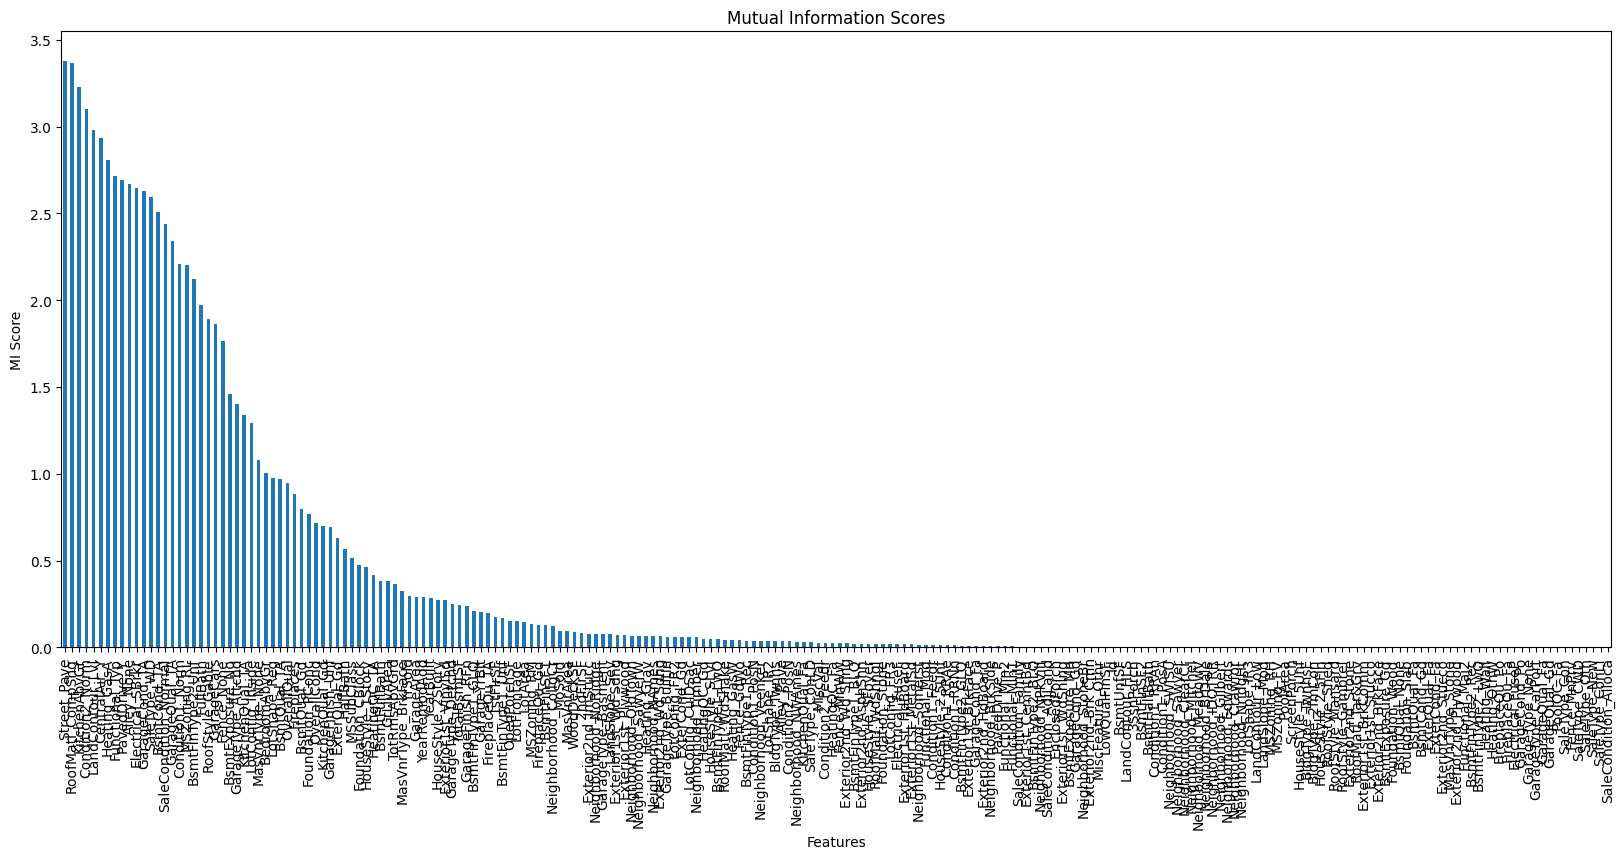

Top 10 Selected Features:
 ['KitchenAbvGr', 'Street_Pave', 'Alley_None', 'LandContour_Lvl', 'Condition2_Norm', 'RoofMatl_CompShg', 'Heating_GasA', 'CentralAir_Y', 'Electrical_SBrkr', 'Functional_Typ']


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

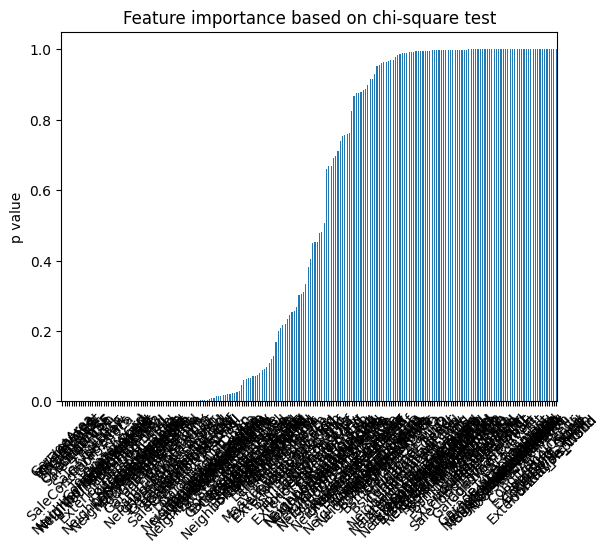

In [54]:

from scipy.stats import chi2_contingency
chi_ls = []
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1] > 1:
        p_value = chi2_contingency(c)[1]
    else:
        p_value = 1
    chi_ls.append(p_value)

pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Text(0.5, 1.0, 'Anova')

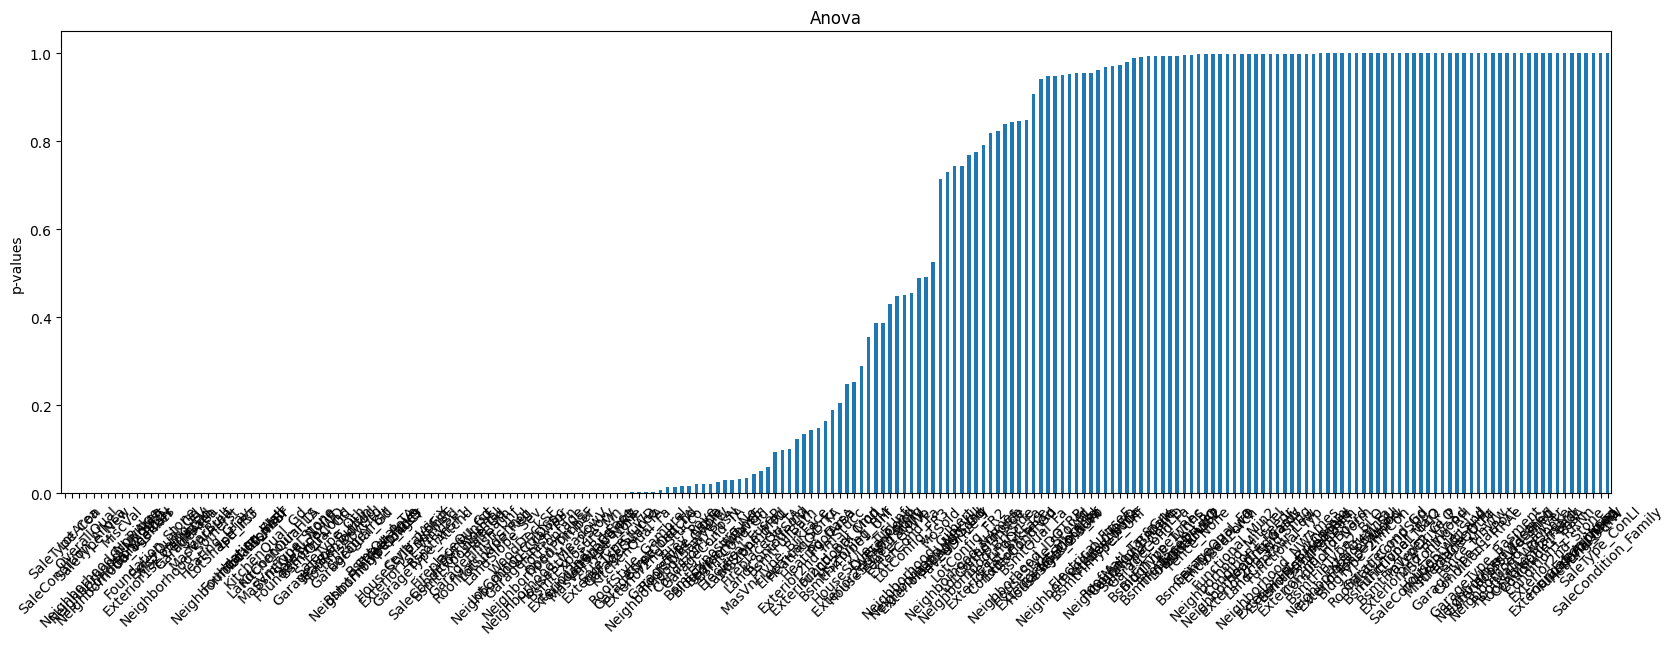

In [55]:
from sklearn.feature_selection import (f_classif,SelectFpr,SelectKBest)
import matplotlib.pyplot as plt
univariate = f_classif(x_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")


In [56]:
df = pd.read_csv('/content/titanic_train.csv')

In [57]:
df.shape

(891, 12)

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [60]:

[col for col in df.columns if df[col].isnull().sum()>0]

['Age', 'Cabin', 'Embarked']

In [61]:

df[df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [62]:

df=df.drop('Cabin',axis=1)

In [63]:
df=df.drop('Embarked',axis=1)

In [64]:

df=df.drop('Name',axis=1)

In [65]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [66]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [67]:

X = pd.get_dummies(X,drop_first=True)

In [68]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 20  21  22  24  26  35  37  50  51  54  67  68  75  76  80  83  85  88
  93 100 103 104 108 114 124 129 133 136 139 142 144 146 160 161 165 173
 179 180 181 187 189 191 196 197 201 203 204 205 206 209 211 214 220 231
 238 240 247 248 249 254 259 263 264 267 272 279 281 285 287 300 307 312
 318 321 328 329 330 333 338 340 348 351 353 354 358 360 361 364 367 369
 374 377 379 380 382 384 387 395 396 404 413 416 418 419 424 432 437 439
 443 445 446 449 456 457 458 463 466 472 479 484 491 495 496 497 498 507
 509 511 513 514 515 516 517 520 524 527 530 533 536 537 539 549 553 556
 566 571 575 578 579 602 604 605 607 608 618 623 626 628 630 631 633 635
 642 648 649 651 654 655 671 674 675] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:

Text(0.5, 1.0, 'Anova')

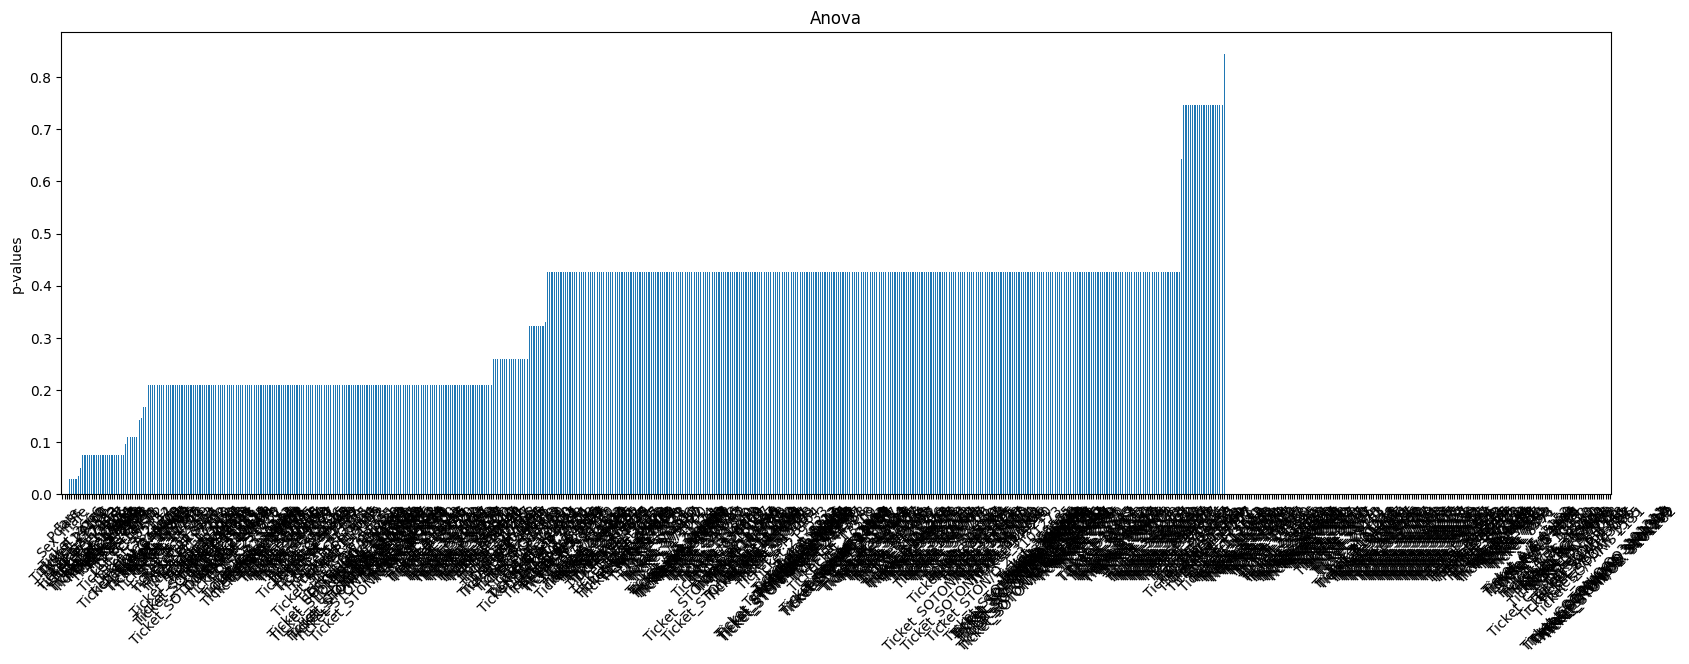

In [69]:
from sklearn.feature_selection import (f_classif,SelectFpr,SelectKBest)
import matplotlib.pyplot as plt
univariate = f_classif(x_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")

In [70]:
c= pd.crosstab(y_train,x_train['Sex_male'])

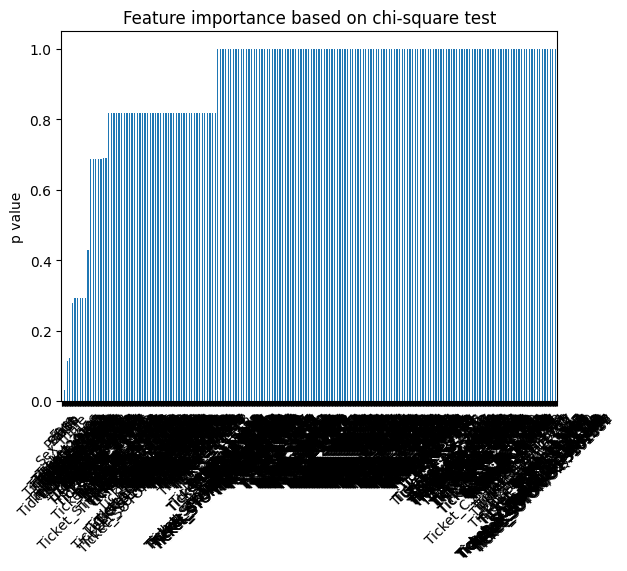

In [71]:

from scipy.stats import chi2_contingency
chi_ls = []
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1] > 1:
        p_value = chi2_contingency(c)[1]
    else:
        p_value = 1
    chi_ls.append(p_value)

pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")
plt.show()

In [72]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)

171

In [73]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [74]:
quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

0

In [75]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))


0


In [76]:

grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

0


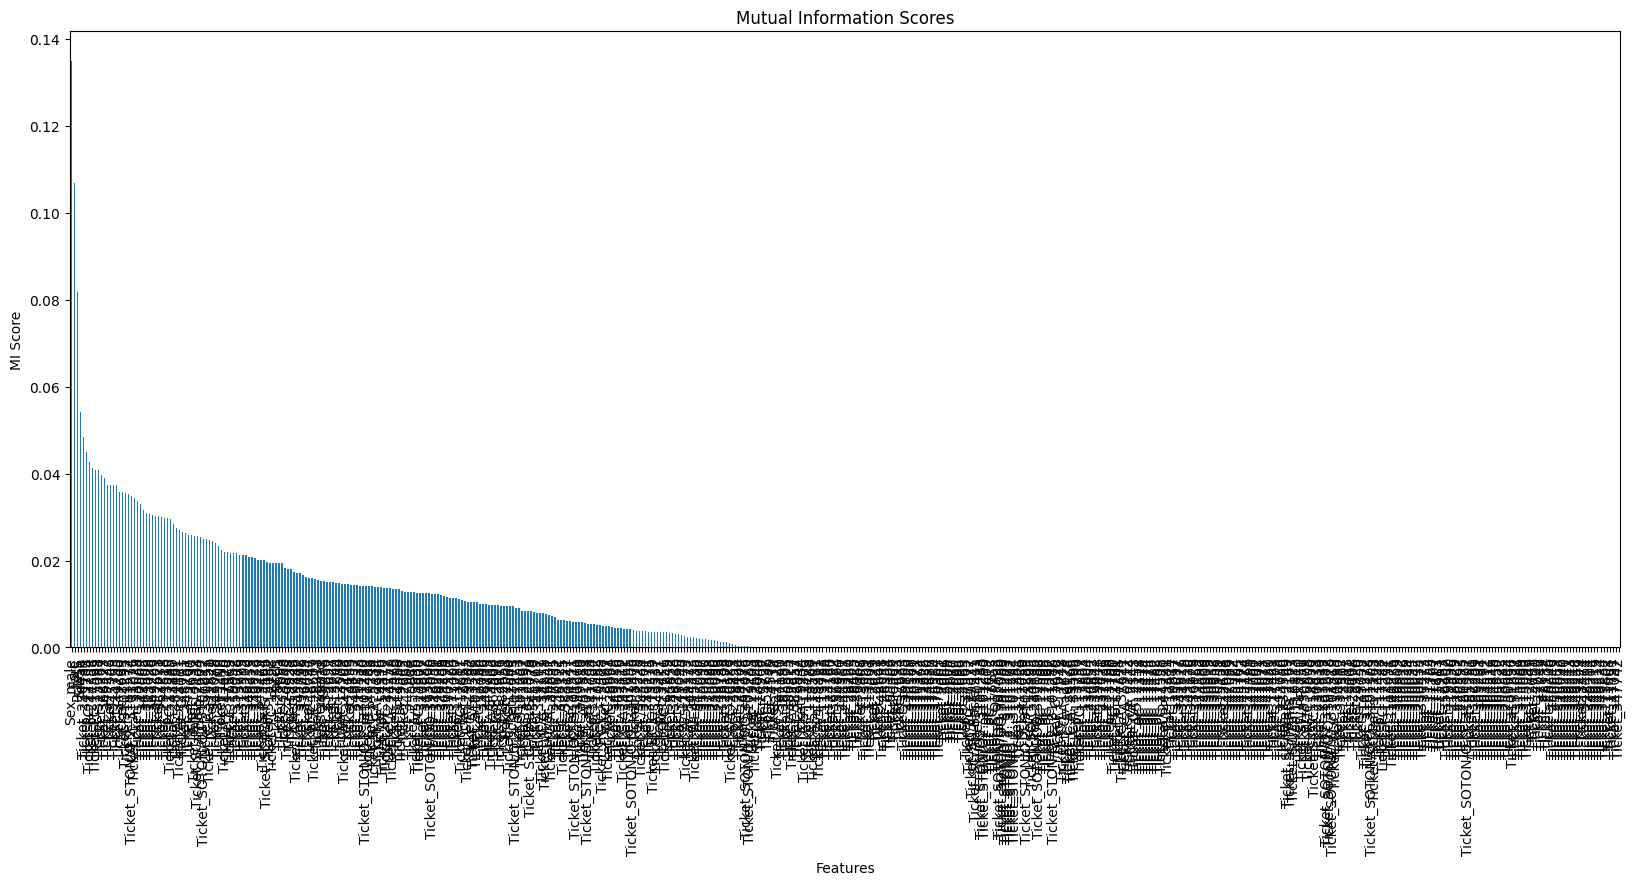

Top 10 Selected Features:
 ['Fare', 'Sex_male', 'Ticket_2223', 'Ticket_2697', 'Ticket_345767', 'Ticket_370375', 'Ticket_C.A. 33595', 'Ticket_PC 17477', 'Ticket_SC/PARIS 2133', 'Ticket_W./C. 14263']


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [79]:
df = pd.read_csv('/content/Santander Customer Satisfaction_train.csv')

In [80]:
df.shape

(76020, 371)

In [81]:
df

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [83]:

with open('/content/Santander Customer Satisfaction_train.csv') as f:
    for i, line in enumerate(f, start=1):
        if i == 2684:
            print(line)
            break

5362,2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,3,0,0,3,3,0,0,0,0,0,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3000,0,0,0,0,0,0,0,3000,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,3000,2555.58,3000,2851.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94452.6,0



In [85]:
import pandas as pd

# Load safely, skipping malformed rows temporarily
df3 = pd.read_csv('/content/Santander Customer Satisfaction_train.csv', on_bad_lines='skip')
print(df3.shape)
print(df3.isnull().sum().sum())  # total NaNs

(76020, 371)
0


In [86]:
[col for col in df3.columns if df3[col].isnull().sum()>0]

[]

In [87]:
for col in df3.columns:
    if df3[col].dtype != 'object':
        df3[col].fillna(df3[col].median(), inplace=True)
    else:
        df3[col].fillna(df3[col].mode()[0], inplace=True)

/tmp/ipython-input-2964411064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[col].fillna(df3[col].median(), inplace=True)


In [88]:

df3.columns


Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [89]:
X = df3.drop('TARGET',axis=1)
y = df3['TARGET']


In [90]:
X = pd.get_dummies(X,drop_first=True)


In [91]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]
len(constant_features)


38

In [93]:
x_train.drop(labels=constant_features,axis=1,inplace=True) #deleting constant features
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [94]:

quasi_constant_feat=[]

for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

108

In [95]:
x_train.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test.drop(labels=quasi_constant_feat,axis=1,inplace=True)


In [96]:

dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))


10


In [97]:
x_train.drop(labels=dup_features,axis=1,inplace=True)
x_test.drop(labels=dup_features,axis=1,inplace=True)


In [98]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

98


In [99]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

In [100]:
dup=[]
for i in range (0,len(x_train.columns)):
    col1=x_train.columns[i]
    for col2 in x_train.columns[i+1:]:
        if x_train[col1].equals(x_train[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

0


In [101]:
x_train.drop(labels=dup_features,axis=1,inplace=True)
x_test.drop(labels=dup_features,axis=1,inplace=True)


In [102]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

0


In [103]:

x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)

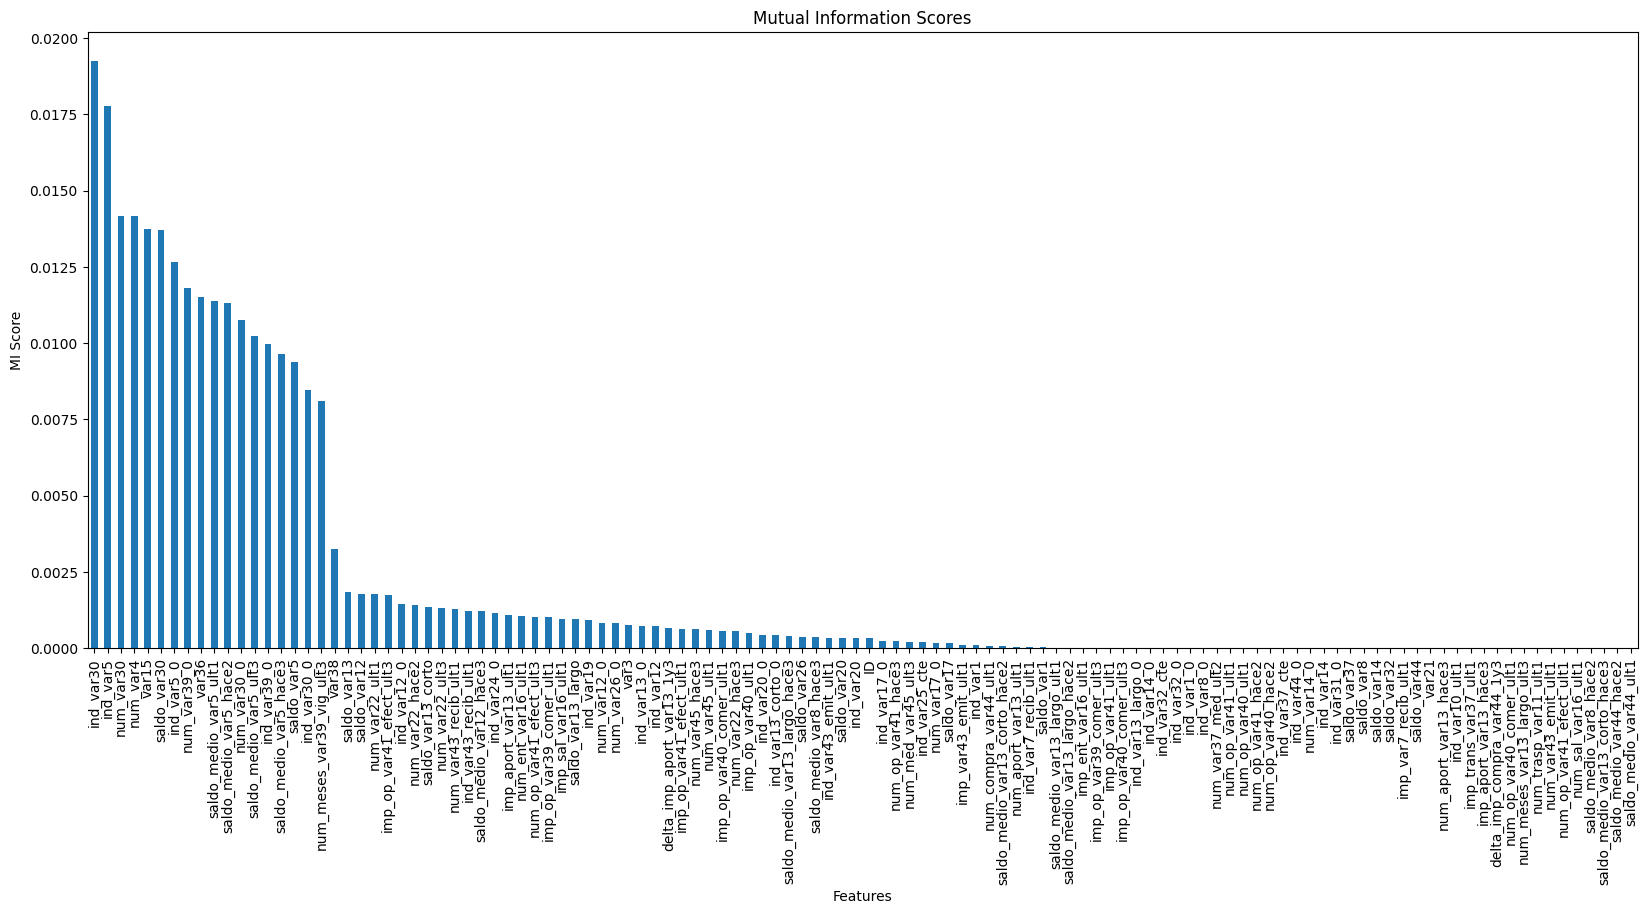

Top 10 Selected Features:
 ['var15', 'ind_var5_0', 'ind_var5', 'ind_var30', 'num_var4', 'num_var30_0', 'num_var30', 'saldo_var30', 'saldo_medio_var5_hace2', 'saldo_medio_var5_ult3']


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi, index=x_train.columns)

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.show()

selector = SelectKBest(score_func=mutual_info_classif, k=10)
selector.fit(x_train.fillna(0), y_train)

selected_features = x_train.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())

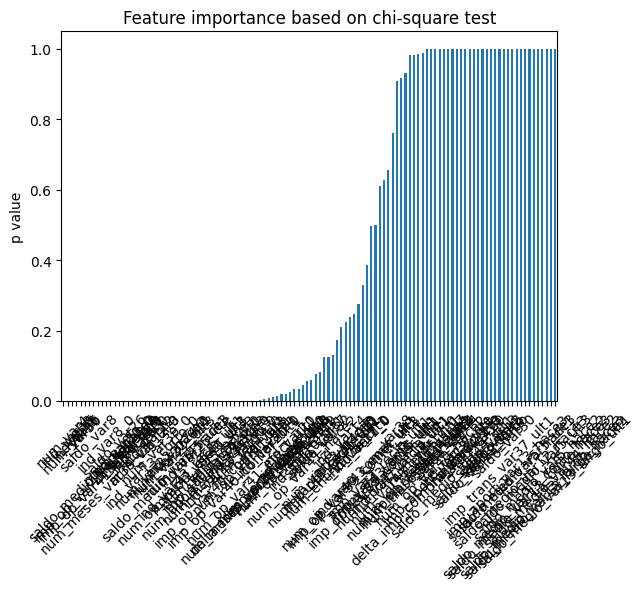

In [105]:
from scipy.stats import chi2_contingency
chi_ls = []
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1] > 1:
        p_value = chi2_contingency(c)[1]
    else:
        p_value = 1
    chi_ls.append(p_value)

pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")
plt.show()

Text(0.5, 1.0, 'Anova')

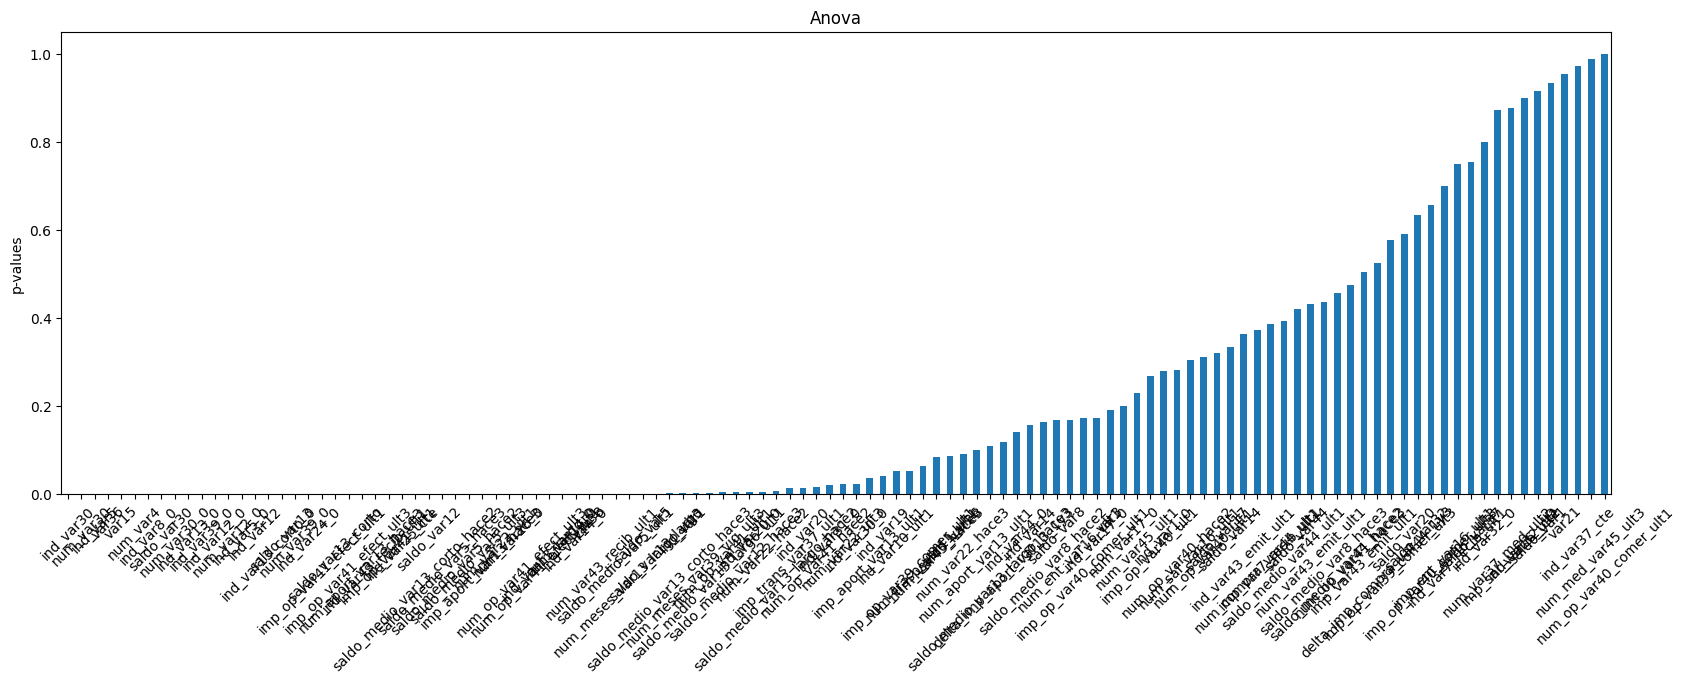

In [106]:
from sklearn.feature_selection import (f_classif,SelectFpr,SelectKBest)
import matplotlib.pyplot as plt
univariate = f_classif(x_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Anova")